In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bug_df = pd.read_csv('My_Requests_13_12_2022_11_24.csv', index_col='Key', parse_dates=['Created', 'Updated'])
bug_df['Created'] = bug_df['Created'].dt.date
bug_df['Updated'] = bug_df['Updated'].dt.date
bug_df = bug_df.sort_values(by=('Priority'), ascending=True)

In [2]:
bug_df.head()

,Type,Reporter,Created,Summary,Status,Priority,Resolution,Updated,Assignee
Key,,,,,,,,,
CP-70569,Report a Bug,Jake Daylong,2022-11-16,Batch Processing Not Working,Resolved,Blocker,Fixed,2022-11-17,Sandeep Yerra
CP-70654,Report a Bug,Dmitry Ischenko,2022-11-17,E-mail Notifications are not getting generated,Resolved,Blocker,Fixed,2022-12-07,Amarnath Reddy Ambati
CP-71021,Report a Bug,Dmitry Ischenko,2022-11-23,Unable to view or modify user in system. Pote...,In Progress,Blocker,NaN,2022-12-08,suresh.katta
CP-71619,Report a Bug,Jake Daylong,2022-12-07,Unable to Consolidate Shipments,In Progress,Blocker,NaN,2022-12-07,Venakata Rao Nakka
CP-71628,Report a Bug,Jake Daylong,2022-12-07,NMFCNO validation needs to be removed for frei...,In Progress,Blocker,NaN,2022-12-07,Venakata Rao Nakka


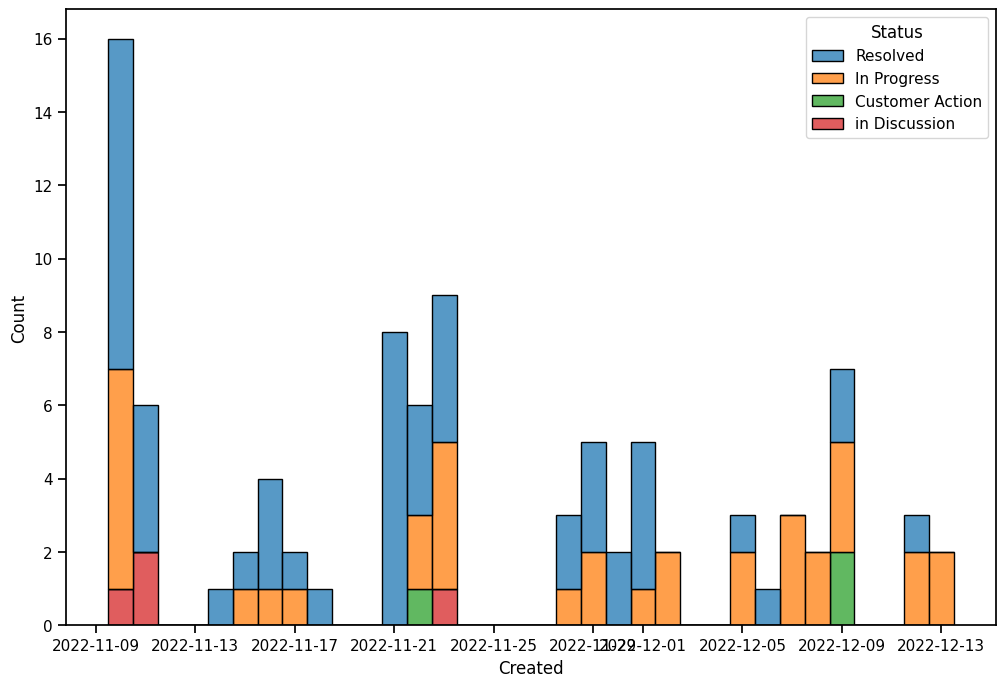

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
palette = {'NaN':'tab:red', 'Fixed':'tab:orange'}
#palette = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue']
sns.set_context('notebook')
sns.histplot(data=bug_df, x='Created', hue='Status', multiple='stack')
plt.savefig(fname='count_of_bugs_creation_date')

Plot for Count of Bugs by Creation Date

In [4]:
today = pd.to_datetime('today').date()
bug_df['Aging'] = today - bug_df['Created']
#print(bug_df)
bug_df_aging = bug_df
bug_df_aging = bug_df_aging.sort_values(by='Aging', ascending=False)
bug_df_aging.to_excel(excel_writer='bugs_aging.xlsx')
bug_df_aging.to_csv('bugs_aging.csv')

ValueError: The palette dictionary is missing keys: {'in Discussion'}

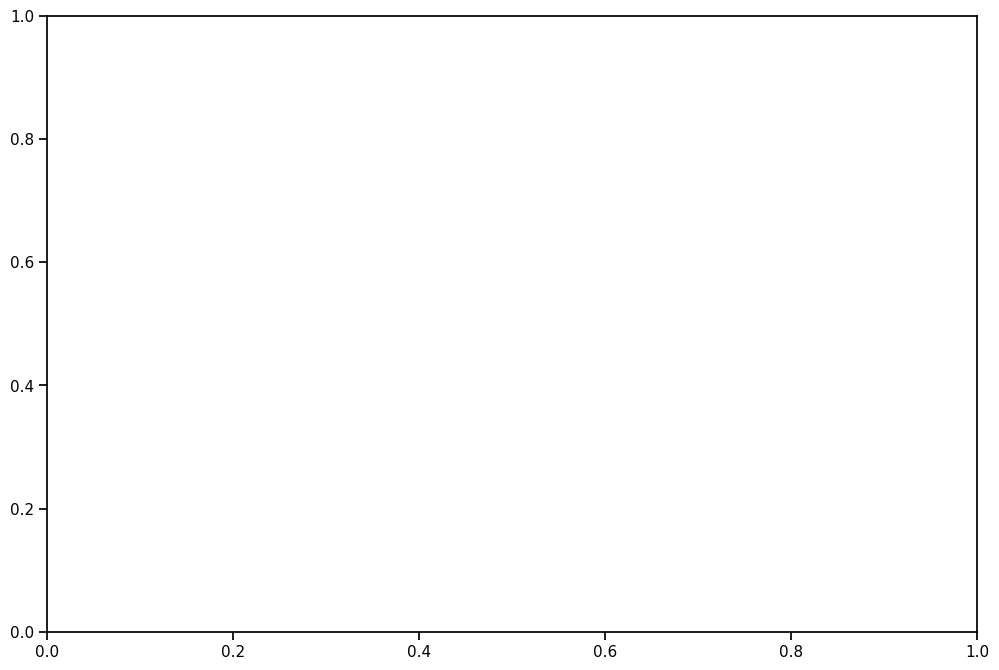

In [5]:
bug_df_aging = bug_df_aging.sort_values(by='Status', ascending=True)
fig, ax = plt.subplots(figsize=(12,8))
palette = {'Customer Action':'tab:red','In Progress':'tab:blue', 'Open':'tab:orange', 'Resolved':'tab:green'}
sns.set_context('notebook')
sns.histplot(data=bug_df_aging, x='Priority', hue='Status', multiple='stack', palette=palette)
plt.savefig(fname='Count_By_Priority')

Count by Priority

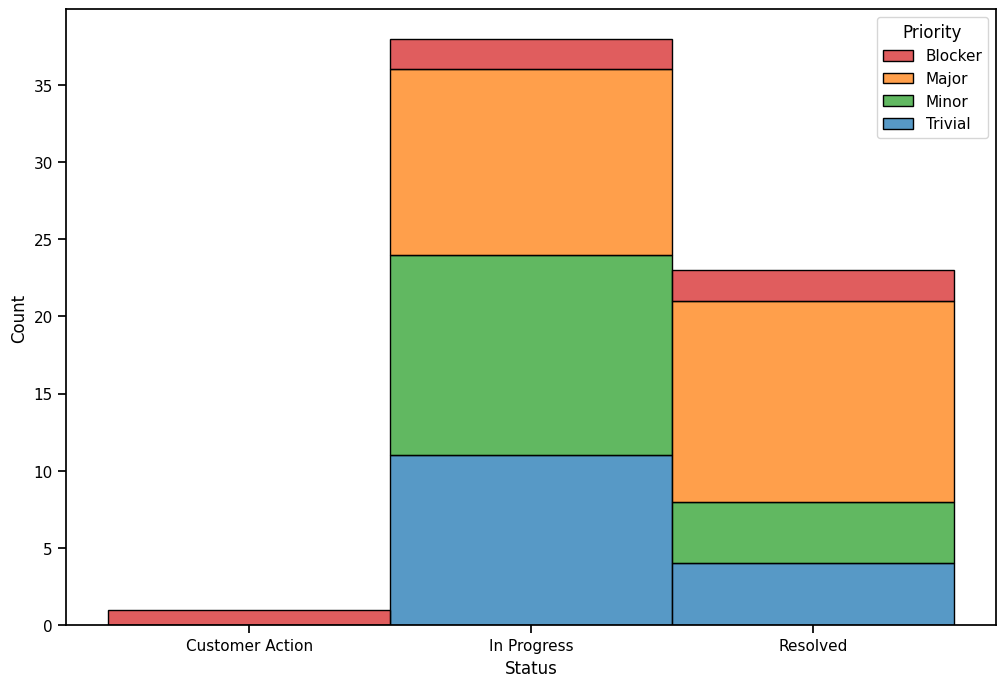

In [ ]:
bug_df_aging = bug_df_aging.sort_values(by='Priority', ascending=True)
fig, ax = plt.subplots(figsize=(12,8))
palette = {'Blocker':'tab:red', 'Major':'tab:orange', 'Minor':'tab:green', 'Trivial':'tab:blue'}
sns.set_context('notebook')
sns.histplot(data=bug_df_aging, x='Status', hue='Priority', multiple='stack', palette=palette)
plt.savefig(fname='Count_By_Status')

In [ ]:
bug_df_count = bug_df.groupby('Created').count()
bug_df_count['Adj_Sum'] = bug_df_count['Type'] - bug_df_count['Resolution']
bug_df_cumsum = bug_df_count.cumsum() 
#bug_df_count.head()
bug_df_cumsum.head()


,Type,Reporter,Summary,Status,Priority,Resolution,Updated,Assignee,Aging,Adj_Sum
Created,,,,,,,,,,
2022-11-10,16,16,16,16,16,6,16,16,16,10
2022-11-11,22,22,22,22,22,9,22,22,22,13
2022-11-14,23,23,23,23,23,9,23,23,23,14
2022-11-15,25,25,25,25,25,10,25,25,25,15
2022-11-16,29,29,29,29,29,12,29,29,29,17


In [ ]:

bug_df_count_upd = bug_df.groupby('Updated').count()
bug_df_count_upd['Res_Sum'] = bug_df_count_upd['Resolution']
bug_df_cumsum_res = bug_df_count_upd.cumsum()
bug_df_cumsum_res.head(10)


,Type,Reporter,Created,Summary,Status,Priority,Resolution,Assignee,Aging,Res_Sum
Updated,,,,,,,,,,
2022-11-10,1,1,1,1,1,1,1,1,1,1
2022-11-11,4,4,4,4,4,4,2,4,4,2
2022-11-14,5,5,5,5,5,5,2,5,5,2
2022-11-16,7,7,7,7,7,7,2,7,7,2
2022-11-17,16,16,16,16,16,16,4,16,16,4
2022-11-19,17,17,17,17,17,17,4,17,17,4
2022-11-20,18,18,18,18,18,18,4,18,18,4
2022-11-21,20,20,20,20,20,20,5,20,20,5
2022-11-22,27,27,27,27,27,27,10,27,27,10


In [ ]:
bug_df_cumsum_res_new_df = bug_df_cumsum_res.to_csv('test_csv.csv')
bug_df_cumsum_res_new_df = pd.read_csv('test_csv.csv')
bug_df_cumsum_res_new_df.head()

,Updated,Type,Reporter,Created,Summary,Status,Priority,Resolution,Assignee,Aging,Res_Sum
0,2022-11-10,1,1,1,1,1,1,1,1,1,1
1,2022-11-11,4,4,4,4,4,4,2,4,4,2
2,2022-11-14,5,5,5,5,5,5,2,5,5,2
3,2022-11-16,7,7,7,7,7,7,2,7,7,2
4,2022-11-17,16,16,16,16,16,16,4,16,16,4


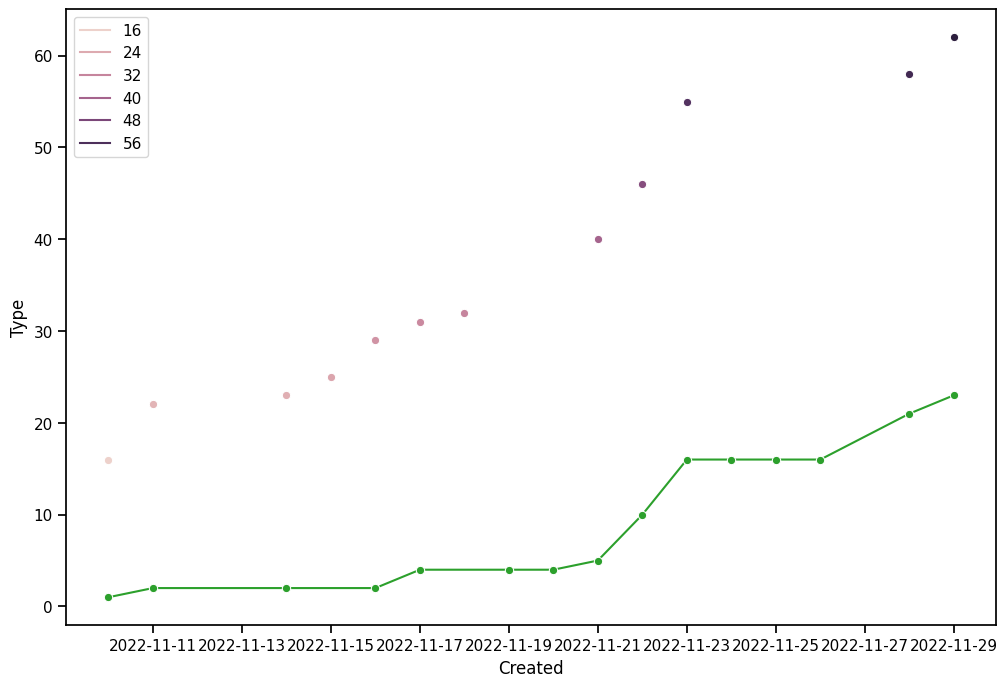

In [ ]:

fig, ax = plt.subplots(figsize=(12,8))
#palette = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue']
sns.set_context('notebook')
sns.lineplot(data=bug_df_cumsum, x='Created', y='Type', hue='Updated', marker='o', legend='auto')
#sns.lineplot(data=bug_df_cumsum, x='Created', y='Adj_Sum', marker='o', legend='auto')
sns.lineplot(data=bug_df_cumsum_res, x='Updated', y='Res_Sum', marker='o', legend='auto')
#plt.legend(labels=["CumSum of Bugs", "CumSum of Resolved Bugs"])
plt.savefig(fname='Cumsum_Total_vs_Resolved')

Cumulative Sum of Total Bugs (Adjusted for Resolved bugs) and Cumulative Sum of Resolved Bugs